# **UofT Building Energy Consumption Anomaly Detection using Machine Learning**

By Zichen Liu


## Sources:
1. Building Energy Consumption - Sustainability Office UofT

2. Temperature Data - https://toronto.weatherstats.ca/download.html



In [10]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import SVG
from scipy.stats import randint,uniform
from graphviz import Source
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

# Upload the files

In [11]:
from google.colab import files
uploaded = files.upload()

In [12]:
weather_data = pd.read_csv('weatherstats_toronto_normal_monthly.csv')
energy_data = pd.read_excel('UTSG CED CHD FY2019-2023 (1).xlsx')

##EDA

In [13]:
weather_data.head()

,date,max_dew_point_v,max_dew_point_s,max_dew_point_c,max_dew_point_d,max_relative_humidity_v,max_relative_humidity_s,max_relative_humidity_c,max_relative_humidity_d,max_temperature_v,...,snow_c,snow_d,snow_on_ground_v,snow_on_ground_s,snow_on_ground_c,snow_on_ground_d,solar_radiation_v,solar_radiation_s,solar_radiation_c,solar_radiation_d
0,6/1/2024,15.17,1.03,30.0,1994-06-01 2023-06-01,84.21,4.43,30.0,1994-06-01 2023-06-01,24.72,...,30,1994-06-01 2023-06-01,0.0,0.00,20.0,1994-06-01 2013-06-01,NaN,NaN,NaN,NaN
1,5/1/2024,9.59,1.86,30.0,1994-05-01 2023-05-01,81.91,4.97,30.0,1994-05-01 2023-05-01,19.20,...,30,1994-05-01 2023-05-01,0.0,0.00,21.0,1994-05-01 2020-05-01,NaN,NaN,NaN,NaN
2,4/1/2024,3.17,1.51,30.0,1994-04-01 2023-04-01,80.91,4.76,30.0,1994-04-01 2023-04-01,12.06,...,30,1994-04-01 2023-04-01,0.5,0.75,29.0,1994-04-01 2022-04-01,NaN,NaN,NaN,NaN
3,3/1/2024,-1.58,2.23,30.0,1994-03-01 2023-03-01,82.58,4.38,30.0,1994-03-01 2023-03-01,5.06,...,30,1994-03-01 2023-03-01,3.0,3.02,30.0,1994-03-01 2023-03-01,NaN,NaN,NaN,NaN
4,2/1/2024,-4.74,2.37,30.0,1994-02-01 2023-02-01,84.62,3.05,30.0,1994-02-01 2023-02-01,-0.13,...,30,1994-02-01 2023-02-01,6.5,5.37,30.0,1994-02-01 2023-02-01,NaN,NaN,NaN,NaN


In [14]:
energy_data.head()

,Archibus No.,Archibus Building Name,Month,Consumption kWh
0,1,University College,2018-04-01,126993.000
1,1,University College,2018-05-01,97771.065
2,1,University College,2018-06-01,119654.935
3,1,University College,2018-07-01,95081.000
4,1,University College,2018-08-01,137121.000


In [15]:
print(len(weather_data.columns))
weather_data.columns

53


Index(['date', 'max_dew_point_v', 'max_dew_point_s', 'max_dew_point_c',
       'max_dew_point_d', 'max_relative_humidity_v', 'max_relative_humidity_s',
       'max_relative_humidity_c', 'max_relative_humidity_d',
       'max_temperature_v', 'max_temperature_s', 'max_temperature_c',
       'max_temperature_d', 'max_wind_speed_v', 'max_wind_speed_s',
       'max_wind_speed_c', 'max_wind_speed_d', 'min_dew_point_v',
       'min_dew_point_s', 'min_dew_point_c', 'min_dew_point_d',
       'min_relative_humidity_v', 'min_relative_humidity_s',
       'min_relative_humidity_c', 'min_relative_humidity_d',
       'min_temperature_v', 'min_temperature_s', 'min_temperature_c',
       'min_temperature_d', 'min_wind_speed_v', 'min_wind_speed_s',
       'min_wind_speed_c', 'min_wind_speed_d', 'precipitation_v',
       'precipitation_s', 'precipitation_c', 'precipitation_d', 'rain_v',
       'rain_s', 'rain_c', 'rain_d', 'snow_v', 'snow_s', 'snow_c', 'snow_d',
       'snow_on_ground_v', 'snow_on_ground

In [16]:
print(weather_data.shape)
weather_data.isnull().sum()

# So Solar Radiation is all NULL need to drop

(1000, 53)


,0
date,0
max_dew_point_v,154
max_dew_point_s,154
max_dew_point_c,154
max_dew_point_d,154
max_relative_humidity_v,154
max_relative_humidity_s,154
max_relative_humidity_c,154
max_relative_humidity_d,154
max_temperature_v,0


After initially looking through the data. I realized there are many features that I do not understand. The dates are misaligned since there is more weather data than energy data. And there are a lot of NULL values, especically for solar radiation where it is completely NULL. Need to clean that up. Since there is only 5 years worth of data, I am thinking about Boostrapping to make more synthetic data to train the model. The features are all suffixed with "_v" (value), "_s" (standard deviation), "_c" (count), and "_d" (date range for historical data). We only care about the value for those features during the timeframe, assuming they are given as averages.

# Prepare and clean the data


In [17]:
# Drop the Null values
weather_data = weather_data.dropna(axis=1)
energy_data = energy_data.dropna(axis=1)
weather_data.isnull().sum()
energy_data.isnull().sum()

,0
Archibus No.,0
Month,0
Consumption kWh,0


In [18]:
# Convert date columns to datetime
weather_data['date'] = pd.to_datetime(weather_data['date'])
energy_data['Month'] = pd.to_datetime(energy_data['Month'])

In [19]:
# Identify the date range of the energy data
start_date = energy_data['Month'].min()
end_date = energy_data['Month'].max()

# Filter the weather data to match the date range of the energy data
filtered_weather_data = weather_data[(weather_data['date'] >= start_date) & (weather_data['date'] <= end_date)]

filtered_weather_data.head()

,date,max_temperature_v,max_temperature_s,max_temperature_c,max_temperature_d,min_temperature_v,min_temperature_s,min_temperature_c,min_temperature_d,precipitation_v,...,precipitation_c,precipitation_d,rain_v,rain_s,rain_c,rain_d,snow_v,snow_s,snow_c,snow_d
15,2023-03-01,5.00,2.60,30,1993-03-01 2022-03-01,-3.95,2.20,30,1993-03-01 2022-03-01,48.66,...,30,1993-03-01 2022-03-01,33.00,21.84,30,1993-03-01 2022-03-01,16.36,11.94,30,1993-03-01 2022-03-01
16,2023-02-01,-0.34,2.67,30,1993-02-01 2022-02-01,-8.54,3.01,30,1993-02-01 2022-02-01,51.68,...,30,1993-02-01 2022-02-01,24.48,18.49,30,1993-02-01 2022-02-01,29.23,17.25,30,1993-02-01 2022-02-01
17,2023-01-01,-1.16,2.55,30,1993-01-01 2022-01-01,-8.92,3.50,30,1993-01-01 2022-01-01,59.48,...,30,1993-01-01 2022-01-01,33.06,27.43,30,1993-01-01 2022-01-01,29.66,17.66,30,1993-01-01 2022-01-01
18,2022-12-01,2.06,2.36,30,1992-12-01 2021-12-01,-4.68,2.49,30,1992-12-01 2021-12-01,57.31,...,30,1992-12-01 2021-12-01,34.37,16.81,30,1992-12-01 2021-12-01,23.93,16.63,30,1992-12-01 2021-12-01
19,2022-11-01,7.87,2.22,30,1992-11-01 2021-11-01,0.18,1.56,30,1992-11-01 2021-11-01,65.26,...,30,1992-11-01 2021-11-01,56.88,29.33,30,1992-11-01 2021-11-01,8.39,8.54,30,1992-11-01 2021-11-01


Another thing I realized is that all the features ending with _C is 30, which I am assuming that it means count = 30. So the max_temp and min_temp are actually averages throughout the month.

In [20]:
# Drop the Features that do not end with v besides the date
features_to_drop = [col for col in filtered_weather_data.columns if not col.endswith('_v') and col != 'date']
filtered_weather_data = filtered_weather_data.drop(columns=features_to_drop)
filtered_weather_data.head()

,date,max_temperature_v,min_temperature_v,precipitation_v,rain_v,snow_v
15,2023-03-01,5.00,-3.95,48.66,33.00,16.36
16,2023-02-01,-0.34,-8.54,51.68,24.48,29.23
17,2023-01-01,-1.16,-8.92,59.48,33.06,29.66
18,2022-12-01,2.06,-4.68,57.31,34.37,23.93
19,2022-11-01,7.87,0.18,65.26,56.88,8.39


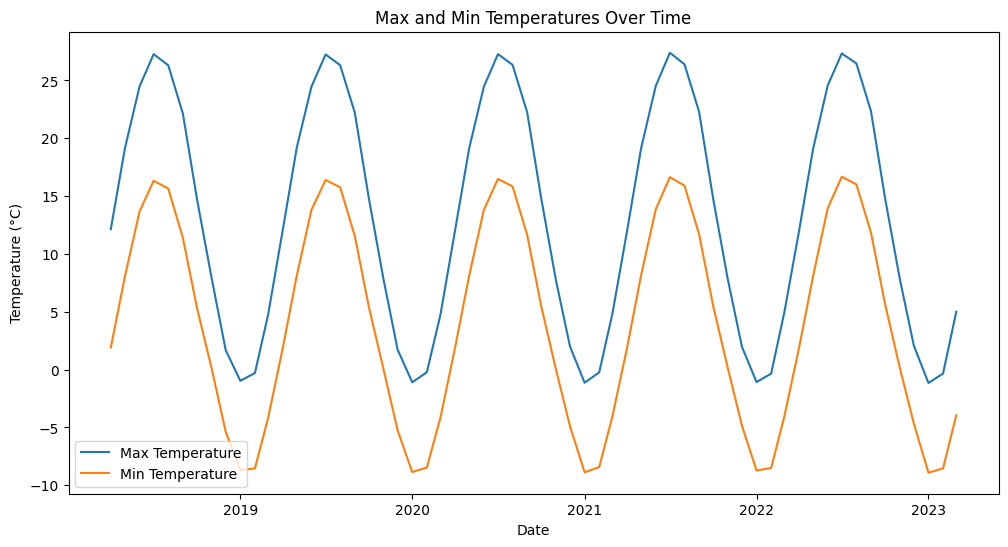

In [21]:
# Visualizing temp with time
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(filtered_weather_data['date'], filtered_weather_data['max_temperature_v'], label='Max Temperature')
plt.plot(filtered_weather_data['date'], filtered_weather_data['min_temperature_v'], label='Min Temperature')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Max and Min Temperatures Over Time')
plt.show()

The plot shows the seasonal trend, which is expected of the temperature.

In [22]:
# I want to calculate the maximum temperature over the years to see if there is an upward trend
max_temp_by_year = filtered_weather_data.groupby(filtered_weather_data['date'].dt.year)['max_temperature_v'].max()
print(max_temp_by_year)

date
2018    27.28
2019    27.25
2020    27.28
2021    27.40
2022    27.34
2023     5.00
Name: max_temperature_v, dtype: float64


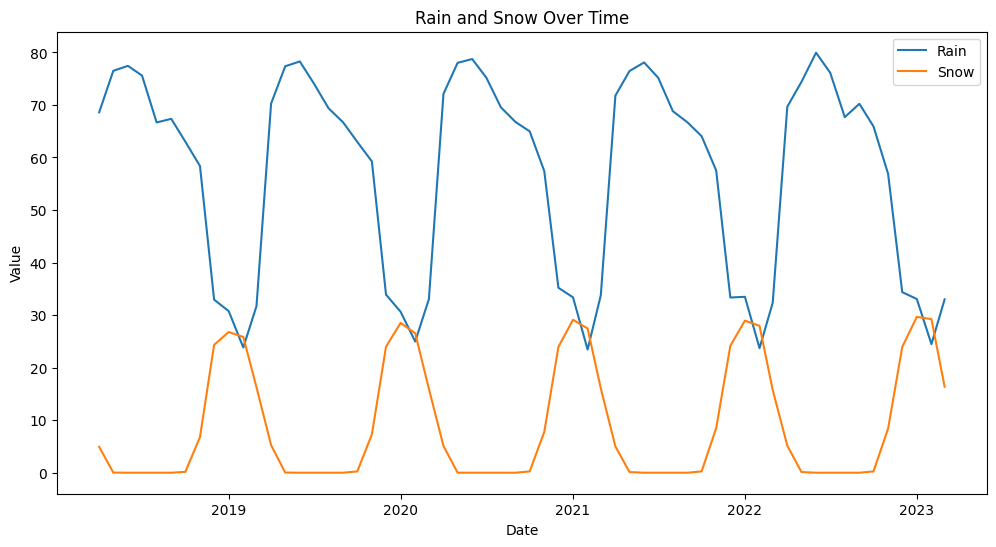

In [23]:
# Now I want to visualize what the other features look like
plt.figure(figsize=(12, 6))
plt.plot(filtered_weather_data['date'], filtered_weather_data['rain_v'], label='Rain')
plt.plot(filtered_weather_data['date'], filtered_weather_data['snow_v'], label='Snow')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Rain and Snow Over Time')
plt.show()

The plot shows that the amount of rain and snow are lagged by 6 months.

EDA of Energy_Data can be see on the other colab file: https://colab.research.google.com/drive/1cYHSEWnIEnEAfJEMnD4qIt78b5r4D0rN?usp=sharing

In [24]:
energy_data.head()

,Archibus No.,Month,Consumption kWh
0,1,2018-04-01,126993.000
1,1,2018-05-01,97771.065
2,1,2018-06-01,119654.935
3,1,2018-07-01,95081.000
4,1,2018-08-01,137121.000


In [25]:
# Now both tables are good, we need to aggregate them by months
df = pd.merge(filtered_weather_data, energy_data, left_on='date', right_on='Month', how='inner')
df.drop('Month', axis=1, inplace=True)
df

,date,max_temperature_v,min_temperature_v,precipitation_v,rain_v,snow_v,Archibus No.,Consumption kWh
0,2023-03-01,5.00,-3.95,48.66,33.0,16.36,1,1.456736e+05
1,2023-03-01,5.00,-3.95,48.66,33.0,16.36,2,1.459700e+05
2,2023-03-01,5.00,-3.95,48.66,33.0,16.36,3,1.824630e+05
3,2023-03-01,5.00,-3.95,48.66,33.0,16.36,4,7.043646e+04
4,2023-03-01,5.00,-3.95,48.66,33.0,16.36,5,1.459571e+06
...,...,...,...,...,...,...,...,...
4254,2018-04-01,12.14,1.91,74.75,68.6,4.92,501,4.895527e+05
4255,2018-04-01,12.14,1.91,74.75,68.6,4.92,675,3.465000e+04
4256,2018-04-01,12.14,1.91,74.75,68.6,4.92,008A,2.056579e+05
4257,2018-04-01,12.14,1.91,74.75,68.6,4.92,030a,1.878000e+04


##Establishing the Baseline

In [26]:
# I want to estbalish a baseline of energy consumption for each building
baseline_consumption = df.groupby('Archibus No.')['Consumption kWh'].transform('mean')
df['Anomaly'] = df['Consumption kWh'] > baseline_consumption
df.head(-1)


,date,max_temperature_v,min_temperature_v,precipitation_v,rain_v,snow_v,Archibus No.,Consumption kWh,Anomaly
0,2023-03-01,5.00,-3.95,48.66,33.0,16.36,1,1.456736e+05,True
1,2023-03-01,5.00,-3.95,48.66,33.0,16.36,2,1.459700e+05,True
2,2023-03-01,5.00,-3.95,48.66,33.0,16.36,3,1.824630e+05,True
3,2023-03-01,5.00,-3.95,48.66,33.0,16.36,4,7.043646e+04,False
4,2023-03-01,5.00,-3.95,48.66,33.0,16.36,5,1.459571e+06,False
...,...,...,...,...,...,...,...,...,...
4253,2018-04-01,12.14,1.91,74.75,68.6,4.92,172,9.420000e+03,True
4254,2018-04-01,12.14,1.91,74.75,68.6,4.92,501,4.895527e+05,True
4255,2018-04-01,12.14,1.91,74.75,68.6,4.92,675,3.465000e+04,True
4256,2018-04-01,12.14,1.91,74.75,68.6,4.92,008A,2.056579e+05,True


# Feature Selection


To understand the factors contributing to anomalies in energy consumption for each building, include a mix of weather-related and temporal features.

#### 1. Weather-Related Features
These features capture the impact of external weather conditions on energy consumption.

- **max_temperature_v**: Average Maximum temperature during the period.
- **min_temperature_v**: Average Minimum temperature during the period.
- **precipitation_v**: Average precipitation during the period.
- **rain_v**: Rainfall amount during the period.
- **snow_v**: Snowfall amount during the period.

Additional weather-related features:
- **Temperature difference**: max\_temperature\_v - min\_temperature\_v. Captures extreme weather fluctuations.
- **Precipitation intensity**: A combined feature to measure overall precipitation impact: rain\_v + snow\_v.

#### 2. Temporal Features
These features capture how energy consumption varies over time due to seasonal and cyclical effects.

- **Month**: Energy consumption often varies seasonally.

#### 3. Anomaly-Related Target
- **Anomaly**: This is the target variable, indicating whether a certain energy consumption value is anomalous or not.



In [27]:
df['Temperature Difference'] = df['max_temperature_v'] - df['min_temperature_v']
df['Precipitation Intensity'] = df['rain_v'] + df['snow_v']
df['Month'] = df['date'].dt.month.astype(str)
df['Anomaly'] = df['Anomaly'].astype(int)
df['Archibus No.'] = df['Archibus No.'].astype(str)
df

,date,max_temperature_v,min_temperature_v,precipitation_v,rain_v,snow_v,Archibus No.,Consumption kWh,Anomaly,Temperature Difference,Precipitation Intensity,Month
0,2023-03-01,5.00,-3.95,48.66,33.0,16.36,1,1.456736e+05,1,8.95,49.36,3
1,2023-03-01,5.00,-3.95,48.66,33.0,16.36,2,1.459700e+05,1,8.95,49.36,3
2,2023-03-01,5.00,-3.95,48.66,33.0,16.36,3,1.824630e+05,1,8.95,49.36,3
3,2023-03-01,5.00,-3.95,48.66,33.0,16.36,4,7.043646e+04,0,8.95,49.36,3
4,2023-03-01,5.00,-3.95,48.66,33.0,16.36,5,1.459571e+06,0,8.95,49.36,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4254,2018-04-01,12.14,1.91,74.75,68.6,4.92,501,4.895527e+05,1,10.23,73.52,4
4255,2018-04-01,12.14,1.91,74.75,68.6,4.92,675,3.465000e+04,1,10.23,73.52,4
4256,2018-04-01,12.14,1.91,74.75,68.6,4.92,008A,2.056579e+05,1,10.23,73.52,4
4257,2018-04-01,12.14,1.91,74.75,68.6,4.92,030a,1.878000e+04,0,10.23,73.52,4


# Preprocessing

In [28]:
# I want to hotencode the month
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['Month']])
encoded_features = encoder.fit_transform(df[['Month']])
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(['Month']))
df = pd.concat([df, encoded_df], axis=1)
df.drop(['Month'], axis=1, inplace=True)

# I also need to standardize numerics since logistic regression would be affected by different scales
scaler = StandardScaler()
df[['max_temperature_v', 'min_temperature_v', 'precipitation_v', 'rain_v', 'snow_v', 'Temperature Difference', 'Precipitation Intensity']] = scaler.fit_transform(df[['max_temperature_v', 'min_temperature_v', 'precipitation_v', 'rain_v', 'snow_v', 'Temperature Difference', 'Precipitation Intensity']])
df


,date,max_temperature_v,min_temperature_v,precipitation_v,rain_v,snow_v,Archibus No.,Consumption kWh,Anomaly,Temperature Difference,...,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9
0,2023-03-01,-0.817925,-0.879826,-1.659567,-1.232754,0.649389,1,1.456736e+05,1,-0.315093,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-03-01,-0.817925,-0.879826,-1.659567,-1.232754,0.649389,2,1.459700e+05,1,-0.315093,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-03-01,-0.817925,-0.879826,-1.659567,-1.232754,0.649389,3,1.824630e+05,1,-0.315093,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-03-01,-0.817925,-0.879826,-1.659567,-1.232754,0.649389,4,7.043646e+04,0,-0.315093,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-03-01,-0.817925,-0.879826,-1.659567,-1.232754,0.649389,5,1.459571e+06,0,-0.315093,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4254,2018-04-01,-0.113739,-0.223509,0.902949,0.610047,-0.374249,501,4.895527e+05,1,0.606547,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4255,2018-04-01,-0.113739,-0.223509,0.902949,0.610047,-0.374249,675,3.465000e+04,1,0.606547,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4256,2018-04-01,-0.113739,-0.223509,0.902949,0.610047,-0.374249,008A,2.056579e+05,1,0.606547,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4257,2018-04-01,-0.113739,-0.223509,0.902949,0.610047,-0.374249,030a,1.878000e+04,0,0.606547,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Splitting Data

In [29]:
X = df.drop(columns=['Anomaly','date', 'Consumption kWh', 'Archibus No.'])  # Features
y = df['Anomaly']  # Target
X

,max_temperature_v,min_temperature_v,precipitation_v,rain_v,snow_v,Temperature Difference,Precipitation Intensity,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9
0,-0.817925,-0.879826,-1.659567,-1.232754,0.649389,-0.315093,-1.754898,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.817925,-0.879826,-1.659567,-1.232754,0.649389,-0.315093,-1.754898,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.817925,-0.879826,-1.659567,-1.232754,0.649389,-0.315093,-1.754898,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.817925,-0.879826,-1.659567,-1.232754,0.649389,-0.315093,-1.754898,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.817925,-0.879826,-1.659567,-1.232754,0.649389,-0.315093,-1.754898,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4254,-0.113739,-0.223509,0.902949,0.610047,-0.374249,0.606547,0.805790,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4255,-0.113739,-0.223509,0.902949,0.610047,-0.374249,0.606547,0.805790,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4256,-0.113739,-0.223509,0.902949,0.610047,-0.374249,0.606547,0.805790,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4257,-0.113739,-0.223509,0.902949,0.610047,-0.374249,0.606547,0.805790,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [31]:
# Use L2 logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)

print(f'The train score is {train_score:.3f} and the test score is {test_score:.3f}')

The train score is 0.623 and the test score is 0.603


In [32]:
# Use L1 Logistic Regression
logregl1 = LogisticRegression(penalty='l1', solver='saga', max_iter=5000)
logregl1.fit(X_train, y_train)

# calculate the score
train_score = logregl1.score(X_train, y_train)
test_score = logregl1.score(X_test, y_test)
print(f'The train score is {train_score:.3} and the test score is {test_score:.3}')

The train score is 0.622 and the test score is 0.604


In [33]:
# Get beta coefficients
betas = pd.Series(logregl1.coef_[0], index=X_train.columns)
# Get intercept, and append it to coefficients
inter = pd.Series({"Intercept": logregl1.intercept_[0]})
betas = pd.concat([betas, inter]).abs().sort_values(ascending = True)
# Print the all betas (including the intercept)
print('\n', betas)

print(logregl1.score(X_train, y_train))
print(logregl1.score(X_test, y_test))




 max_temperature_v          0.000000
min_temperature_v          0.000000
Month_7                    0.000000
rain_v                     0.000000
Month_1                    0.000000
Precipitation Intensity    0.000000
Intercept                  0.210034
snow_v                     0.225947
Month_10                   0.266730
Month_6                    0.608767
Month_4                    0.617425
Month_8                    0.877464
Month_9                    0.939753
Month_5                    1.194675
Month_2                    1.586257
precipitation_v            1.586885
Month_11                   1.889638
Temperature Difference     2.107404
Month_3                    2.197031
Month_12                   2.592313
dtype: float64
0.6216612855884943
0.6044600938967136


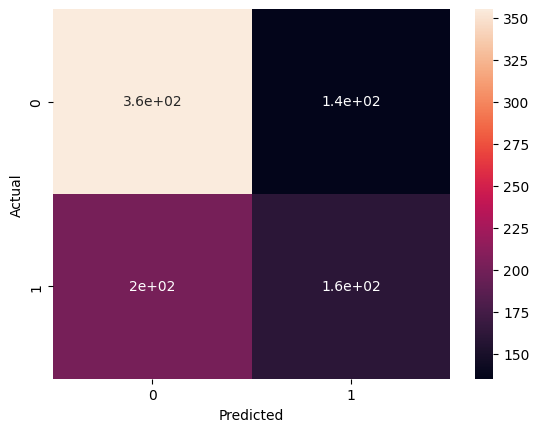

In [34]:
# Make a prediction
y_pred = logregl1.predict(X_test)
# Make the confusion matrix
cfm = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Plot the confusion matrix as a heat map
ax = sns.heatmap(cfm, annot=True)
# Change the axis lables
ax.set(xlabel='Predicted', ylabel='Actual');

Recall =  True Positives (TP) / (False Negatives (FN) + True Positives (TP)) = 160 / (200 + 160) = 0.444

Precision = True Positives (TP) / (False Positives (FP) + True Positives (TP)) = 160 / (140 + 160) = 0.533

# CART Model

The score of this model over training data is 0.687 and 0.667 over the testing data


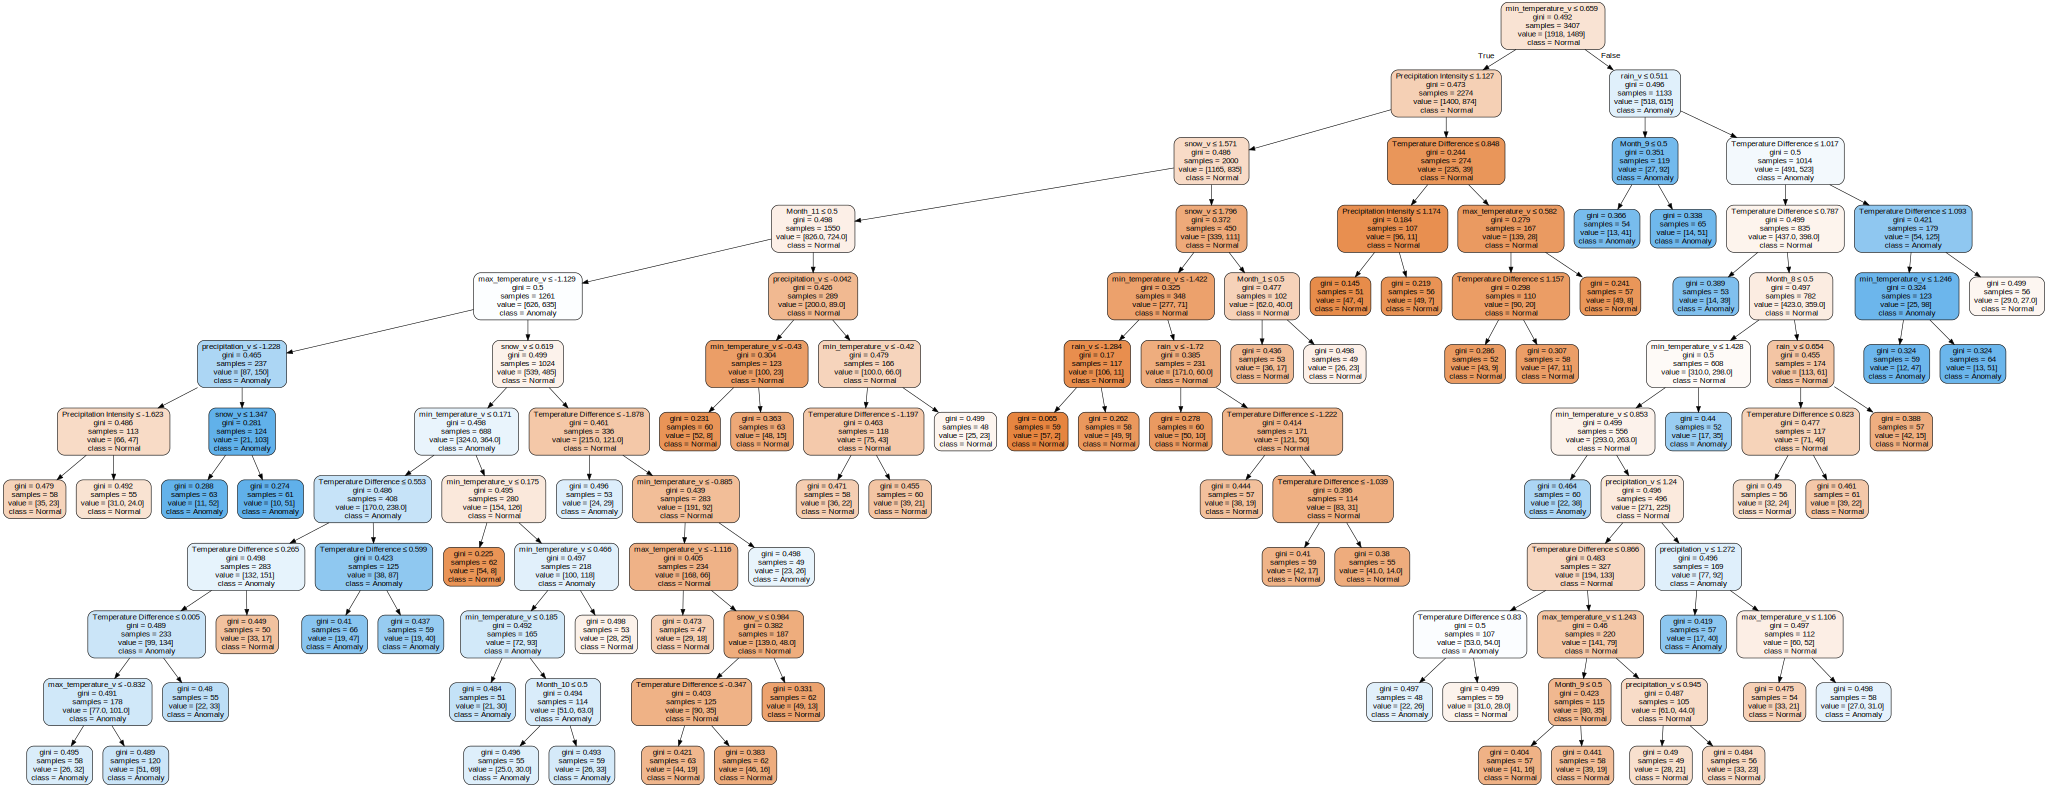

In [51]:
# Train the CART model
cart_model = DecisionTreeClassifier(random_state=3,max_depth=11, min_samples_split= 17)
cart_model.fit(X_train, y_train)
train_score = cart_model.score(X_train, y_train)
test_score = cart_model.score(X_test, y_test)

# Print out summary of model performance
print('The score of this model over training data is {:.3f} and {:.3f} over the testing data'.format(train_score, test_score))

# Visualize the decision tree
dot_data = Source(export_graphviz(cart_model, out_file=None,
                           feature_names=X.columns,
                           class_names=['Normal', 'Anomaly'],
                           filled=True, rounded=True,
                           special_characters=True))
display(SVG(dot_data.pipe(format='svg')))

In [52]:
# print out the most important features and their values
feature_importances = cart_model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                    Feature  Importance
1         min_temperature_v    0.257215
4                    snow_v    0.171485
5    Temperature Difference    0.156093
6   Precipitation Intensity    0.119234
2           precipitation_v    0.114052
9                  Month_11    0.058459
3                    rain_v    0.057395
0         max_temperature_v    0.044722
17                  Month_8    0.017121
7                   Month_1    0.003655
18                  Month_9    0.000534
8                  Month_10    0.000036
10                 Month_12    0.000000
11                  Month_2    0.000000
12                  Month_3    0.000000
13                  Month_4    0.000000
14                  Month_5    0.000000
15                  Month_6    0.000000
16                  Month_7    0.000000


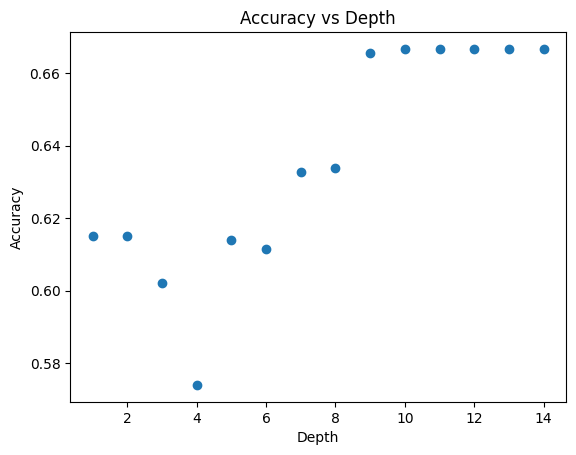

10

In [48]:
depths = range(1, 15)
accuracy = pd.Series(index=depths, dtype=float)

# Write your code here.

# -------------------
for depth in depths:
  cart_model.set_params(max_depth=depth)
  cart_model.fit(X_train, y_train)
  accuracy[depth] = cart_model.score(X_test, y_test)

plt.scatter(accuracy.index, accuracy.values)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth')
plt.show()

# The best performing depth
accuracy.idxmax()


# Cross Validation

## Hyperparameter Tuning for Logistic Regression

In [58]:
logregcv = LogisticRegressionCV(penalty='l1', solver='saga')
logregcv.fit(X_train, y_train)

# -------------------

# Get beta coefficients
betas = pd.Series(logregcv.coef_[0], index=X_train.columns)
# Get intercept, and append it to coefficients
inter = pd.Series({"Intercept": logregcv.intercept_[0]})
betas = pd.concat([betas, inter]).sort_values()
# Print the all betas (including the intercept)
print('\n', betas)

print(logregcv.score(X_train, y_train))
print(logregcv.score(X_test, y_test))
print('Optimal regularization strength: ', logregcv.C_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 precipitation_v           -8.803815
Month_2                   -4.095492
Month_3                   -3.022745
Month_1                   -2.880154
Month_8                   -0.905714
Intercept                 -0.485761
Month_9                   -0.455211
Month_5                    0.044885
Month_7                    0.088767
rain_v                     0.450158
min_temperature_v          0.677346
max_temperature_v          0.748975
Month_6                    1.374094
Month_12                   1.838869
Month_10                   2.403211
snow_v                     2.785532
Temperature Difference     2.941150
Month_4                    3.862678
Month_11                   4.225688
Precipitation Intensity    5.941020
dtype: float64
0.6322277663633695
0.607981220657277
Optimal regularization strength:  [166.81005372]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


A negative coefficient (e.g., precipitation_v = -8.76) means that an increase in this feature decreases the log-odds of the target class (for example, the probability of an anomaly happening decreases as precipitation increases).
The larger the magnitude (whether positive or negative), the greater the effect that feature has on the target outcome.
Positive Coefficients:

A positive coefficient (e.g., Precipitation Intensity = 5.83) means that an increase in this feature increases the log-odds of the target class (for example, the probability of an anomaly happening increases as precipitation intensity increases).
Interpretation of Categorical Variables (Months and Archibus No.):

For features like Month_2 and Month_3, these are likely binary columns created by one-hot encoding. The coefficients show how much being in that specific month affects the log-odds relative to the reference month.
For example, Month_2 = -4.07 means that being in February decreases the log-odds of the target class compared to the reference month.
Similarly, Archibus No._133 = -2.64 means that being in building 133 reduces the probability of the anomaly compared to the reference building (which is implicitly encoded as the baseline).
How to Read This Log-Odds Relationship:
The coefficients tell you how much a unit change in a feature impacts the log-odds of the outcome (an anomaly or not).
For example, Temperature Difference = 3.57 means that for each unit increase in the temperature difference, the log-odds of the anomaly increase by 3.57.
Conversely, precipitation_v = -8.76 means that for each unit increase in precipitation, the log-odds of the anomaly decrease by 8.76.
Impact on the Model:
Larger Coefficients (whether positive or negative) indicate features that have a stronger influence on the outcome.
Smaller Coefficients (closer to 0) indicate features that have a weaker influence.

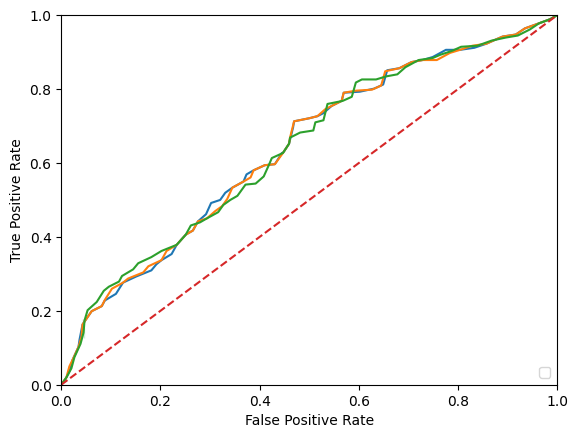

In [40]:
# Plotting ROC curve
FPR, TPR, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
FPR1, TPR1, thresholds1 = roc_curve(y_test, logregl1.predict_proba(X_test)[:, 1])
FPR2, TPR2, thresholds2 = roc_curve(y_test, logregcv.predict_proba(X_test)[:, 1])
sns.lineplot(x=FPR, y=TPR)
sns.lineplot(x=FPR1, y=TPR1)
sns.lineplot(x=FPR2, y=TPR2)

sns.lineplot(x=[0, 1], y=[0, 1], linestyle='--')  # add red line
plt.xlim([0.0, 1.0])  # limit x-axis between 0 and 1
plt.ylim([0.0, 1.0])  # limit y-axis between 0 and 1
plt.xlabel('False Positive Rate')  # lable for x axis
plt.ylabel('True Positive Rate')  # lable for y axis
plt.legend(loc='lower right')  # print legend in lower right corner
plt.show()

## Hyperparameter Tuning for CART

Overfitting to the Test Set: When you choose the model based solely on its performance on the test set, you are essentially using the test set as part of the model selection process. This leads to overfitting to the test set because the model parameters are being adjusted to perform well on this specific data. The test set is supposed to simulate new, unseen data, so using it for tuning parameters undermines its purpose. Thus, this is where cross validation comes in.

In [41]:
# Define the hyperparameter distributions
param_dist = {
    'max_depth': randint(1, 100),
    'min_samples_split': randint(2, 100)
}

# Perform Search
random_search = RandomizedSearchCV(
    estimator=cart_model,
    param_distributions=param_dist,
    n_iter=500,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    return_train_score=True)

# Fit the model
random_search.fit(X_train, y_train)

# Extract the best score and the best hyperparameters
best_score_dt = random_search.best_score_
best_params = random_search.best_params_

# Print the best score and hyperparameters
print(f"Best performance using decision tree is {best_score_dt:.9f} with a max depth of {best_params['max_depth']} and a min samples split of {best_params['min_samples_split']}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best performance using decision tree is 0.676263129 with a max depth of 11 and a min samples split of 17


## Hyperparameter Tuning for Random Forests

In [42]:
param_dist = {
    'max_features': ['sqrt', 'log2', 0.1, 0.25, 0.5],
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 100),
    'min_samples_split': randint(2, 100)
}

randomforest = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=randomforest, param_distributions=param_dist, n_iter=500, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Extract the best score and the best hyperparameters
best_score_rf = random_search.best_score_
best_params = random_search.best_params_

# Print the best score and hyperparameters
print(f"Best n_estimators: {best_params['n_estimators']}, Best Max Features: {best_params['max_features']}, Max depth of {best_params['max_depth']}, Min samples split of {best_params['min_samples_split']}, Best Accuracy: {best_score_rf:.9f}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best n_estimators: 127, Best Max Features: sqrt, Max depth of 15, Min samples split of 55, Best Accuracy: 0.673329716


In [49]:
randomforest = RandomForestClassifier(random_state=42, n_estimators= 127, max_depth= 15, min_samples_split= 55)
randomforest.fit(X_train, y_train)
train_score = randomforest.score(X_train, y_train)
test_score = randomforest.score(X_test, y_test)

# Print out summary of model performance
print('The score of this model over training data is {:.3f} and {:.3f} over the testing data'.format(train_score, test_score))

The score of this model over training data is 0.687 and 0.667 over the testing data


## Hyperparameter Tuning for Gradient Boosting

In [43]:
param_dist = {
    'learning_rate': uniform(0, 0.15),
    'max_depth': [1, 2, 3],
    'n_estimators': randint(10, 200)
}

gradBoost = GradientBoostingClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=gradBoost, param_distributions=param_dist, n_iter=500, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Extract the best score and the best hyperparameters
best_score_gb = random_search.best_score_
best_params = random_search.best_params_

# Print the best score and hyperparameters
print(f"Best n_estimators: {best_params['n_estimators']}, Best Learning Rate: {best_params['learning_rate']}, Best Max Depth: {best_params['max_depth']}, Best Accuracy: {best_score_gb:.9f}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best n_estimators: 193, Best Learning Rate: 0.08890450858190903, Best Max Depth: 3, Best Accuracy: 0.671272624


In [54]:
gradBoost = GradientBoostingClassifier(random_state=42, n_estimators= 193, learning_rate= 00.08890450858190903, max_depth= 3)
gradBoost.fit(X_train, y_train)
train_score = gradBoost.score(X_train, y_train)
test_score = gradBoost.score(X_test, y_test)

# Print out summary of model performance
print('The score of this model over training data is {:.3f} and {:.3f} over the testing data'.format(train_score, test_score))

The score of this model over training data is 0.687 and 0.667 over the testing data


# Results

CART model actually outperformed more complex models like Random Forest and Gradient boosting. I think this is due to a couple of reasons. First, the data to train the models were limited, more complicated models may not have had time to learn the patterns yet. Second, the relationship between the features and the target are not complicated. Logistic regression performed worse than tree methods which can suggest that there are non-linear relationships. Average minimum temperature is the best predictor of anomaly.



# Conclusions (For now)
Based on the limited data from 2018-2021, I could only reach an accuracy of **68%**. However, with more data and improved models, I am confident that the figure will improve.